# Import Data from API

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as datetime
import json,requests

In [153]:
blad = None
kurs_usd = []
kurs_eur = []
kurs_gbp = []
kurs_chf = []

def get_data(api_point,blad):
    data = []
    try:
        # 1. Wykonanie zapytania GET do API
        response = requests.get(api_point, timeout=10) # Ustawienie timeoutu
        # 2. Sprawdzenie, czy odpowiedź jest poprawna (status 200)
        response.raise_for_status() 
        # 3. Parsowanie danych JSON na słownik Pythona
        data = response.json()
        
    except requests.exceptions.RequestException as e:
        # Obsługa błędów związanych z zapytaniem (np. brak połączenia, timeout)
        blad = f"Błąd połączenia z API: {e}"
    except Exception as e:
        # Inne błędy (np. błąd parsowania JSON, choć requests.json() to obsługuje)
        blad = f"Wystąpił nieoczekiwany błąd: {e}"
    return [ data, blad]

   
#[kurs_usd_1 ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/2023-10-15/2024-10-14/",blad)
#[kurs_usd_2 ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/2024-10-15/2025-10-14/",blad)
#kurs_usd = np.concatenate((kurs_usd_1['rates'], kurs_usd_2['rates']))

In [154]:
# Kurs Dolar
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_usd_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/usd/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_usd = np.concatenate(( kurs_usd, kurs_usd_cur['rates']))

df_kurs_usd = pd.DataFrame.from_records(kurs_usd)
#df_kurs_usd = df_kurs_usd.set_index('effectiveDate')
df_kurs_usd.to_csv('kurs_usd.csv')

In [155]:
# Kurs Euro
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_eur_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/eur/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_eur = np.concatenate(( kurs_eur, kurs_eur_cur['rates']))

df_kurs_eur = pd.DataFrame.from_records(kurs_eur)
#df_kurs_eur = df_kurs_eur.set_index('effectiveDate')
df_kurs_eur.to_csv('kurs_eur.csv')

In [156]:
# Kurs Funt Bretyjski
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_gbp_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/gbp/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_gbp = np.concatenate(( kurs_gbp, kurs_gbp_cur['rates']))

df_kurs_gbp = pd.DataFrame.from_records(kurs_gbp)
#df_kurs_gbp = df_kurs_gbp.set_index('effectiveDate')
df_kurs_gbp.to_csv('kurs_gbp.csv')

In [157]:
# Kurs Frank Szwajcarski
for cur in range(1,25):
    nex = cur+1
    if cur < 10:
        cur_str = "0"+str(cur)
    else:
        cur_str = str(cur)
    if nex < 10:
        nex_str = "0"+str(nex)
    else:
        nex_str = str(nex)
    
    [kurs_chf_cur ,blad] = get_data("https://api.nbp.pl/api/exchangerates/rates/a/chf/20"+cur_str+"-10-15/20"+nex_str+"-10-14/",blad)
    kurs_chf = np.concatenate(( kurs_chf, kurs_chf_cur['rates']))

df_kurs_chf = pd.DataFrame.from_records(kurs_chf)
#df_kurs_chf = df_kurs_chf.set_index('effectiveDate')
df_kurs_chf.to_csv('kurs_chf.csv')

In [158]:
currenciesDict = {
'Date':df_kurs_usd['effectiveDate'],
'USD':df_kurs_usd['mid'],
'EUR':df_kurs_eur['mid'],
'GBP':df_kurs_gbp['mid'],
'CHF':df_kurs_chf['mid'],
}
currenciesDF = pd.DataFrame.from_dict(currenciesDict)
currenciesDF["Date"] = pd.to_datetime(currenciesDF["Date"])

In [159]:
currenciesDF

,Date,USD,EUR,GBP,CHF
0,2002-01-02,3.9480,3.5496,5.7275,2.3915
1,2002-01-03,3.9574,3.5699,5.7091,2.4034
2,2002-01-04,3.9383,3.5346,5.6681,2.3895
3,2002-01-07,3.9079,3.5032,5.6362,2.3726
4,2002-01-08,3.9322,3.5015,5.6709,2.3813
...,...,...,...,...,...
6005,2025-10-08,3.6619,4.2533,4.9103,4.5712
6006,2025-10-09,3.6659,4.2569,4.8981,4.5704
6007,2025-10-10,3.6778,4.2583,4.8940,4.5675
6008,2025-10-13,3.6763,4.2592,4.8993,4.5719


Text(0, 0.5, 'Wartość')

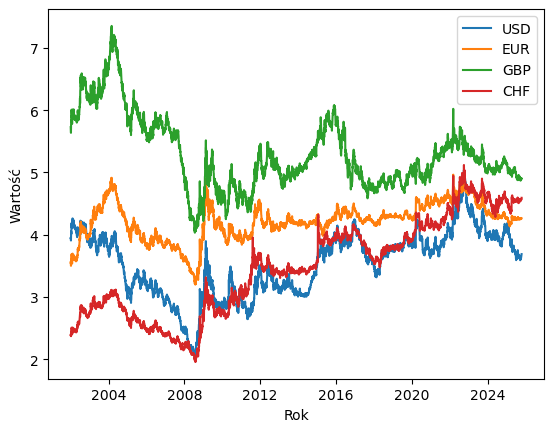

In [160]:
plt.plot(currenciesDF["Date"],currenciesDF['USD'],label='USD');
plt.plot(currenciesDF["Date"],currenciesDF['EUR'],label='EUR');
plt.plot(currenciesDF["Date"],currenciesDF['GBP'],label='GBP');
plt.plot(currenciesDF["Date"],currenciesDF['CHF'],label='CHF');
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Wartość")

In [161]:
currenciesDF.isna().sum()

Date    0
USD     0
EUR     0
GBP     0
CHF     0
dtype: int64

In [162]:
currenciesDF.describe()

,Date,USD,EUR,GBP,CHF
count,6010,6010.000000,6010.000000,6010.000000,6010.000000
mean,2013-11-19 14:10:34.941763840,3.536767,4.215178,5.296953,3.472176
min,2002-01-02 00:00:00,2.022000,3.202600,4.033600,1.959600
25%,2007-12-10 06:00:00,3.132100,4.065075,4.908750,2.800175
50%,2013-11-16 12:00:00,3.675950,4.244500,5.149450,3.475650
75%,2019-10-30 18:00:00,3.931400,4.388275,5.653775,4.064175
max,2025-10-14 00:00:00,5.038100,4.964700,7.351600,5.120000
std,NaN,0.526002,0.294289,0.582943,0.761518


In [163]:
currenciesDF.dtypes

Date    datetime64[ns]
USD            float64
EUR            float64
GBP            float64
CHF            float64
dtype: object

# Data Analysis

In [164]:
currenciesDF['USD_MA_100'] = currenciesDF.USD.rolling(100).mean()
currenciesDF['EUR_MA_100'] = currenciesDF.EUR.rolling(100).mean()
currenciesDF['GBP_MA_100'] = currenciesDF.GBP.rolling(100).mean()
currenciesDF['CHF_MA_100'] = currenciesDF.CHF.rolling(100).mean()

In [165]:
currenciesDF

,Date,USD,EUR,GBP,CHF,USD_MA_100,EUR_MA_100,GBP_MA_100,CHF_MA_100
0,2002-01-02,3.9480,3.5496,5.7275,2.3915,NaN,NaN,NaN,NaN
1,2002-01-03,3.9574,3.5699,5.7091,2.4034,NaN,NaN,NaN,NaN
2,2002-01-04,3.9383,3.5346,5.6681,2.3895,NaN,NaN,NaN,NaN
3,2002-01-07,3.9079,3.5032,5.6362,2.3726,NaN,NaN,NaN,NaN
4,2002-01-08,3.9322,3.5015,5.6709,2.3813,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6005,2025-10-08,3.6619,4.2533,4.9103,4.5712,3.665552,4.258731,4.947444,4.552260
6006,2025-10-09,3.6659,4.2569,4.8981,4.5704,3.664464,4.258803,4.945942,4.552588
6007,2025-10-10,3.6778,4.2583,4.8940,4.5675,3.663790,4.258983,4.944704,4.552898
6008,2025-10-13,3.6763,4.2592,4.8993,4.5719,3.662994,4.259128,4.943363,4.553161


Text(0, 0.5, 'Wartość')

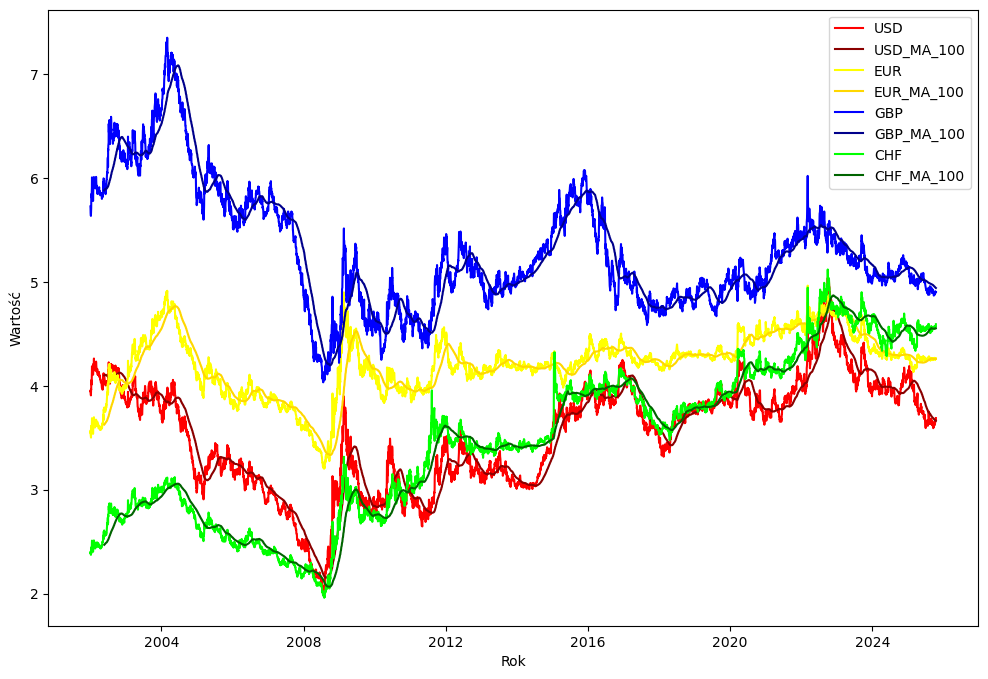

In [166]:
plt.figure(figsize=(12,8))
plt.plot(currenciesDF["Date"],currenciesDF['USD'],'red',label='USD');
plt.plot(currenciesDF["Date"],currenciesDF['USD_MA_100'],'darkred',label='USD_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['EUR'],'yellow',label='EUR');
plt.plot(currenciesDF["Date"],currenciesDF['EUR_MA_100'],'gold',label='EUR_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['GBP'],'blue',label='GBP');
plt.plot(currenciesDF["Date"],currenciesDF['GBP_MA_100'],'darkblue',label='GBP_MA_100');
plt.plot(currenciesDF["Date"],currenciesDF['CHF'],'lime',label='CHF');
plt.plot(currenciesDF["Date"],currenciesDF['CHF_MA_100'],'darkgreen',label='CHF_MA_100');
plt.legend(loc='upper right')
plt.xlabel("Rok")
plt.ylabel("Wartość")

In [167]:
currenciesDF['USD_PCT'] = currenciesDF.USD.pct_change()
currenciesDF['EUR_PCT'] = currenciesDF.EUR.pct_change()
currenciesDF['GBP_PCT'] = currenciesDF.GBP.pct_change()
currenciesDF['CHF_PCT'] = currenciesDF.CHF.pct_change()

Text(0, 0.5, 'Wartość')

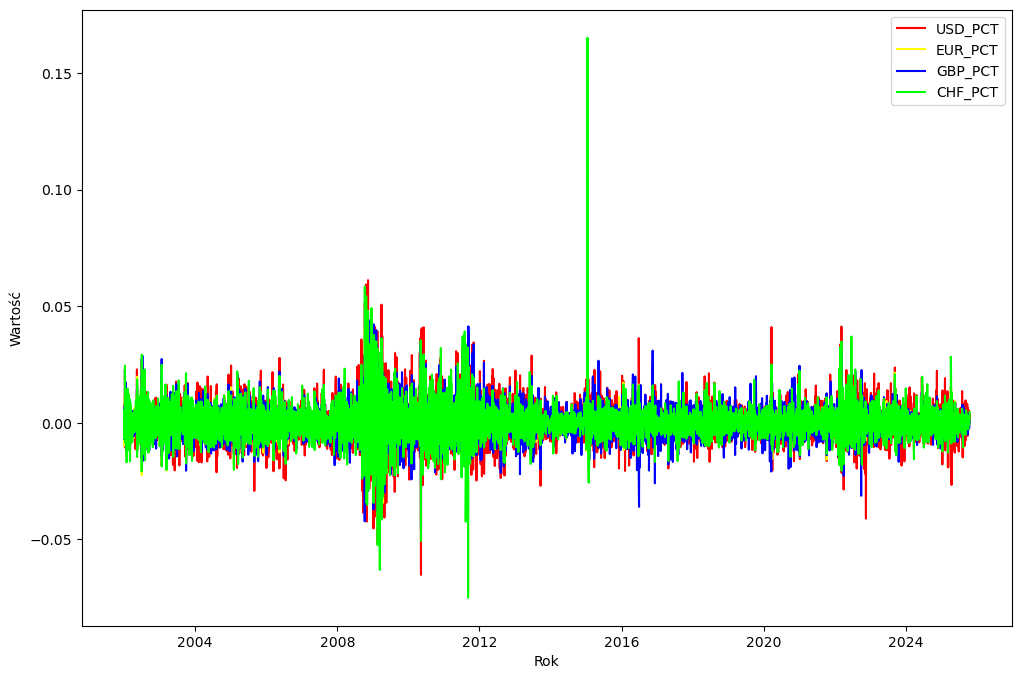

In [168]:
plt.figure(figsize=(12,8))
plt.plot(currenciesDF["Date"],currenciesDF['USD_PCT'],'red',label='USD_PCT');
plt.plot(currenciesDF["Date"],currenciesDF['EUR_PCT'],'yellow',label='EUR_PCT');
plt.plot(currenciesDF["Date"],currenciesDF['GBP_PCT'],'blue',label='GBP_PCT');
plt.plot(currenciesDF["Date"],currenciesDF['CHF_PCT'],'lime',label='CHF_PCT');
plt.legend(loc='upper right')
plt.xlabel("Rok")
plt.ylabel("Wartość")

# Data Processing

In [169]:
usd_data_training = pd.DataFrame(currenciesDF.USD[0:int(len(currenciesDF)*0.7)])
usd_data_testing = pd.DataFrame(currenciesDF.USD[int(len(currenciesDF)*0.7):int(len(currenciesDF))])
eur_data_training = pd.DataFrame(currenciesDF.EUR[0:int(len(currenciesDF)*0.7)])
eur_data_testing = pd.DataFrame(currenciesDF.EUR[int(len(currenciesDF)*0.7):int(len(currenciesDF))])
gbp_data_training = pd.DataFrame(currenciesDF.GBP[0:int(len(currenciesDF)*0.7)])
gbp_data_testing = pd.DataFrame(currenciesDF.GBP[int(len(currenciesDF)*0.7):int(len(currenciesDF))])
chf_data_training = pd.DataFrame(currenciesDF.CHF[0:int(len(currenciesDF)*0.7)])
chf_data_testing = pd.DataFrame(currenciesDF.CHF[int(len(currenciesDF)*0.7):int(len(currenciesDF))])

In [170]:
print(usd_data_training)
print(usd_data_testing)

         USD
0     3.9480
1     3.9574
2     3.9383
3     3.9079
4     3.9322
...      ...
4202  3.7784
4203  3.7695
4204  3.7375
4205  3.7104
4206  3.7069

[4207 rows x 1 columns]
         USD
4207  3.7014
4208  3.6820
4209  3.6548
4210  3.6747
4211  3.6724
...      ...
6005  3.6619
6006  3.6659
6007  3.6778
6008  3.6763
6009  3.6897

[1803 rows x 1 columns]


In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [172]:
usd_data_training_01 = scaler.fit_transform(usd_data_training);
gbp_data_training_01 = scaler.fit_transform(gbp_data_training);
eur_data_training_01 = scaler.fit_transform(eur_data_training);
chf_data_training_01 = scaler.fit_transform(chf_data_training);
usd_data_training_01

array([[0.85951446],
       [0.86370939],
       [0.85518565],
       ...,
       [0.76557479],
       [0.7534809 ],
       [0.75191896]])

# Sequence

In [173]:
usd_x = []
usd_y = []
for i in range (100,usd_data_training_01.shape[0]):
    usd_x.append(usd_data_training_01[i-100:i])
    usd_y.append(usd_data_training_01[i,0])
usd_x,usd_y = np.array(usd_x),np.array(usd_y)

gbp_x = []
gbp_y = []
for i in range (100,gbp_data_training_01.shape[0]):
    gbp_x.append(gbp_data_training_01[i-100:i])
    gbp_y.append(gbp_data_training_01[i,0])
gbp_x,gbp_y = np.array(gbp_x),np.array(gbp_y)

eur_x = []
eur_y = []
for i in range (100,eur_data_training_01.shape[0]):
    eur_x.append(eur_data_training_01[i-100:i])
    eur_y.append(eur_data_training_01[i,0])
eur_x,eur_y = np.array(eur_x),np.array(eur_y)

chf_x = []
chf_y = []
for i in range (100,chf_data_training_01.shape[0]):
    chf_x.append(chf_data_training_01[i-100:i])
    chf_y.append(chf_data_training_01[i,0])
chf_x,chf_y = np.array(chf_x),np.array(chf_y)

In [174]:
usd_x.ndim

3

In [175]:
usd_y.ndim

1

In [176]:
usd_x.shape

(4107, 100, 1)

In [177]:
usd_y.shape

(4107,)

In [178]:
usd_data_training_01

array([[0.85951446],
       [0.86370939],
       [0.85518565],
       ...,
       [0.76557479],
       [0.7534809 ],
       [0.75191896]])

In [179]:
usd_x

array([[[0.85951446],
        [0.86370939],
        [0.85518565],
        ...,
        [0.92524991],
        [0.92395573],
        [0.92547305]],

       [[0.86370939],
        [0.85518565],
        [0.84161906],
        ...,
        [0.92395573],
        [0.92547305],
        [0.91538736]],

       [[0.85518565],
        [0.84161906],
        [0.85246341],
        ...,
        [0.92547305],
        [0.91538736],
        [0.90704213]],

       ...,

       [[0.61143342],
        [0.61299536],
        [0.62392895],
        ...,
        [0.78770975],
        [0.7838272 ],
        [0.77985541]],

       [[0.61299536],
        [0.62392895],
        [0.62116208],
        ...,
        [0.7838272 ],
        [0.77985541],
        [0.76557479]],

       [[0.62392895],
        [0.62116208],
        [0.62285791],
        ...,
        [0.77985541],
        [0.76557479],
        [0.7534809 ]]])

In [180]:
usd_y

array([0.91538736, 0.90704213, 0.90659586, ..., 0.76557479, 0.7534809 ,
       0.75191896])

# Model

In [181]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [182]:
model_usd = Sequential()
model_usd.add(Input(shape=(100,1)))
model_usd.add(LSTM(units=128,activation="tanh",return_sequences=True))
model_usd.add(LSTM(units=64))
model_usd.add(Dense(25))
model_usd.add(Dense(1))

model_gbp = Sequential()
model_gbp.add(Input(shape=(100,1)))
model_gbp.add(LSTM(units=128,activation="tanh",return_sequences=True))
model_gbp.add(LSTM(units=64))
model_gbp.add(Dense(25))
model_gbp.add(Dense(1))

model_eur = Sequential()
model_eur.add(Input(shape=(100,1)))
model_eur.add(LSTM(units=128,activation="tanh",return_sequences=True))
model_eur.add(LSTM(units=64))
model_eur.add(Dense(25))
model_eur.add(Dense(1))

model_chf = Sequential()
model_chf.add(Input(shape=(100,1)))
model_chf.add(LSTM(units=128,activation="tanh",return_sequences=True))
model_chf.add(LSTM(units=64))
model_chf.add(Dense(25))
model_chf.add(Dense(1))

# Training

In [183]:
model_usd.compile(optimizer="adam",loss="mean_squared_error")
model_usd.fit(usd_x,usd_y,epochs=50)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0079
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 7.9442e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 7.1748e-04
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 6.7228e-04
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 6.2060e-04
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 6.0029e-04
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 6.1392e-04
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 5.1937e-04
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 4.7698e-04
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 4.8009e-04
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 4.2858e-04
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 4.0253e-04
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 3.8299e-04
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 3.

In [184]:
model_gbp.compile(optimizer="adam",loss="mean_squared_error")
model_gbp.fit(gbp_x,gbp_y,epochs=50)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0039
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 5.7563e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 4.9347e-04
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 4.5791e-04
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 4.4393e-04
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 3.7684e-04
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 3.5636e-04
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 3.2684e-04
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 3.1144e-04
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 3.1577e-04
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 2.7271e-04
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 2.5809e-04
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 2.4237e-04
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 2.

In [185]:
model_eur.compile(optimizer="adam",loss="mean_squared_error")
model_eur.fit(eur_x,eur_y,epochs=50)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0058
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 7.8073e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 7.0475e-04
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 6.3822e-04
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 5.8309e-04
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 6.0276e-04
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 5.5747e-04
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 4.9076e-04
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.6446e-04
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 4.1599e-04
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 3.8336e-04
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 3.6445e-04
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 3.4388e-04
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 3.

In [186]:
model_chf.compile(optimizer="adam",loss="mean_squared_error")
model_chf.fit(chf_x,chf_y,epochs=50)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0060
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 4.7600e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 4.6385e-04
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 4.6296e-04
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 4.7438e-04
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.2180e-04
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 4.1900e-04
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 3.9932e-04
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 3.8299e-04
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 3.7681e-04
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 3.3254e-04
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 3.2063e-04
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 2.8334e-04
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.

In [187]:
model_usd.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [188]:
model_eur.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_29 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [189]:
model_chf.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_31 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [190]:
model_gbp.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [191]:
model_gbp.save('currency_predict_gbp.keras')
model_eur.save('currency_predict_eur.keras')
model_usd.save('currency_predict_usd.keras')
model_chf.save('currency_predict_chf.keras')

# Testing

In [192]:
usd_data_training.tail(100)

,USD
4107,3.4139
4108,3.4177
4109,3.4224
4110,3.4301
4111,3.4315
...,...
4202,3.7784
4203,3.7695
4204,3.7375
4205,3.7104


In [225]:
usd_last_100_days = usd_data_training.tail(100)

In [226]:
usd_last_100_days

,USD
4107,3.4139
4108,3.4177
4109,3.4224
4110,3.4301
4111,3.4315
...,...
4202,3.7784
4203,3.7695
4204,3.7375
4205,3.7104


In [227]:
usd_final = pd.concat([usd_last_100_days,usd_data_testing],ignore_index=True)

In [228]:
usd_final

,USD
0,3.4139
1,3.4177
2,3.4224
3,3.4301
4,3.4315
...,...
1898,3.6619
1899,3.6659
1900,3.6778
1901,3.6763


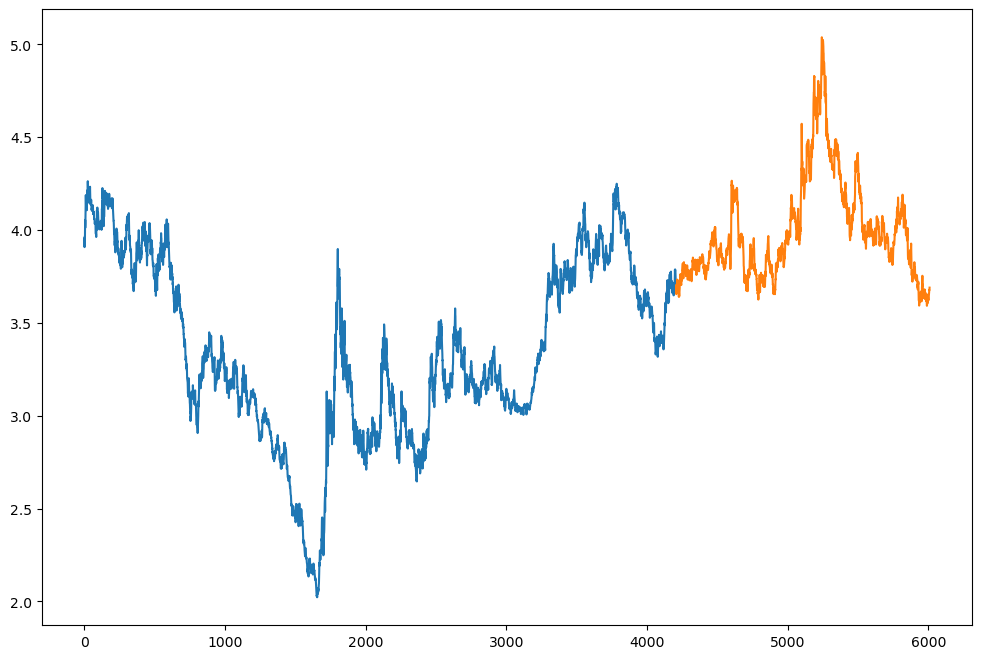

In [234]:
plt.figure(figsize=(12,8))
plt.plot(usd_data_training)
plt.plot(usd_data_testing)

In [197]:
usd_input_data = scaler.fit_transform(usd_final)

In [198]:
test_usd_x = []
test_usd_y = []
for i in range (100,usd_input_data.shape[0]):
    test_usd_x.append(usd_input_data[i-100:i])
    test_usd_y.append(usd_input_data[i,0])
test_usd_x,test_usd_y = np.array(test_usd_x),np.array(test_usd_y)

In [199]:
test_usd_x

array([[[0.03373193],
        [0.03599262],
        [0.03878874],
        ...,
        [0.22624784],
        [0.21012553],
        [0.20804331]],

       [[0.03599262],
        [0.03878874],
        [0.04336962],
        ...,
        [0.21012553],
        [0.20804331],
        [0.20477125]],

       [[0.03878874],
        [0.04336962],
        [0.04420251],
        ...,
        [0.20804331],
        [0.20477125],
        [0.19322982]],

       ...,

       [[0.23082872],
        [0.23719436],
        [0.23404129],
        ...,
        [0.17306205],
        [0.18127194],
        [0.18365162]],

       [[0.23719436],
        [0.23404129],
        [0.22440359],
        ...,
        [0.18127194],
        [0.18365162],
        [0.19073116]],

       [[0.23404129],
        [0.22440359],
        [0.2295199 ],
        ...,
        [0.18365162],
        [0.19073116],
        [0.18983878]]])

In [200]:
usd_y_predicted = model_usd.predict(test_usd_x)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [201]:
usd_y_predicted

array([[0.20953985],
       [0.20645133],
       [0.1974485 ],
       ...,
       [0.18301894],
       [0.18896158],
       [0.19005303]], dtype=float32)

In [202]:
usd_y_predicted = scaler.inverse_transform(usd_y_predicted.reshape(-1,1)).flatten()
test_usd_y = scaler.inverse_transform(test_usd_y.reshape(-1,1)).flatten()

In [203]:
usd_y_predicted

array([3.7094157, 3.7042239, 3.6890912, ..., 3.6648366, 3.6748254,
       3.67666  ], dtype=float32)

In [204]:
test_usd_y

array([3.7014, 3.682 , 3.6548, ..., 3.6778, 3.6763, 3.6897])

Text(0, 0.5, 'Wartość')

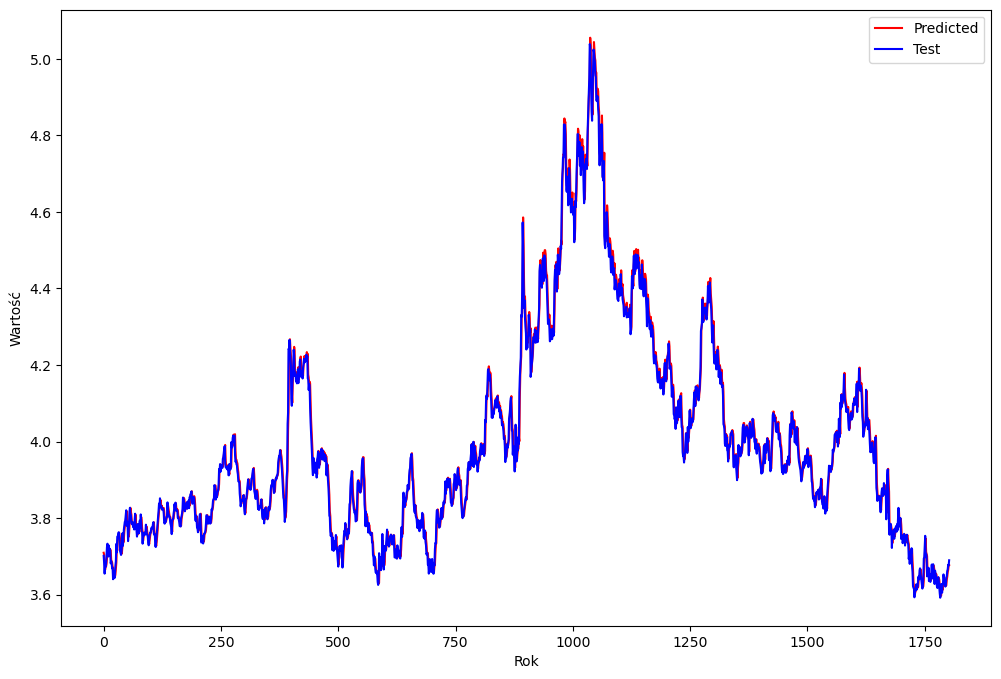

In [205]:
plt.figure(figsize=(12,8))
plt.plot(usd_y_predicted,'red',label='Predicted');
plt.plot(test_usd_y,'blue',label='Test');
plt.legend(loc='upper right')
plt.xlabel("Rok")
plt.ylabel("Wartość")

In [206]:
eur_data_training.tail(100)
eur_past_100_days = eur_data_training.tail(100)
eur_past_100_days

,EUR
4107,4.2085
4108,4.2094
4109,4.2065
4110,4.2070
4111,4.1984
...,...
4202,4.3061
4203,4.2997
4204,4.3101
4205,4.2937


In [207]:
eur_final = pd.concat([eur_past_100_days,eur_data_testing],ignore_index=True)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


Text(0, 0.5, 'Wartość')

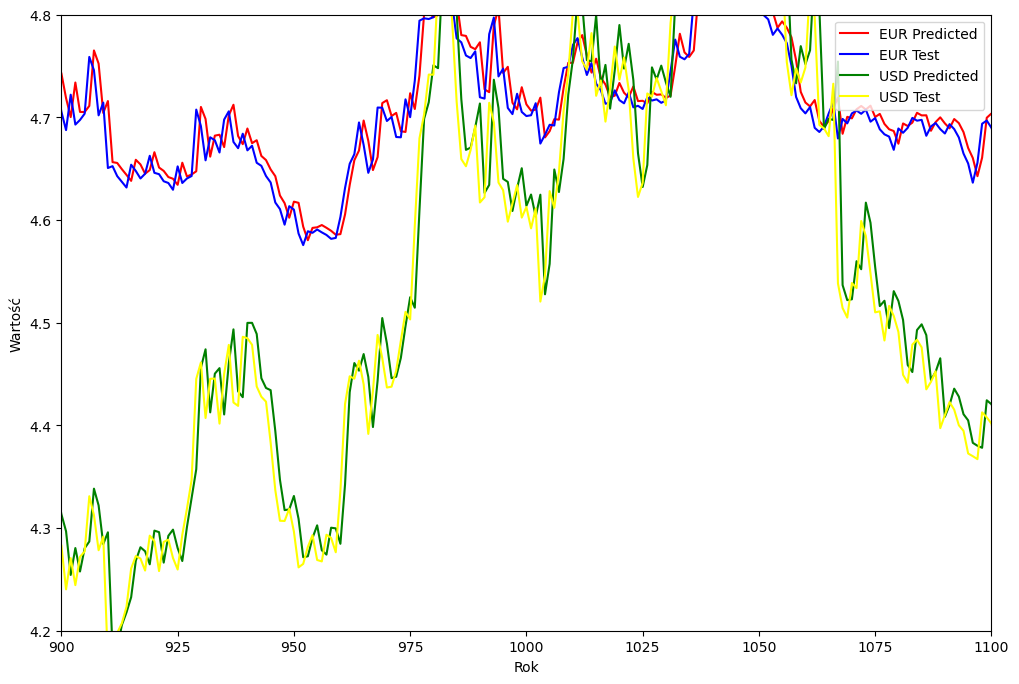

In [224]:
eur_input_data = scaler.fit_transform(eur_final)

eur_test_x = []
eur_test_y = []
for i in range (100,eur_input_data.shape[0]):
    eur_test_x.append(eur_input_data[i-100:i])
    eur_test_y.append(eur_input_data[i,0])
eur_test_x,eur_test_y = np.array(eur_test_x),np.array(eur_test_y)

eur_y_predicted = model_eur.predict(eur_test_x)

eur_y_predicted = scaler.inverse_transform(eur_y_predicted.reshape(-1,1)).flatten()
eur_test_y = scaler.inverse_transform(eur_test_y.reshape(-1,1)).flatten()


plt.figure(figsize=(12,8))
plt.plot(eur_y_predicted,'red',label='EUR Predicted');
plt.plot(eur_test_y,'blue',label='EUR Test');
plt.plot(usd_y_predicted,'green',label='USD Predicted');
plt.plot(test_usd_y,'yellow',label='USD Test');
plt.legend(loc='upper right')
plt.xlim(900,1100)
plt.ylim(4.2,4.8)
plt.xlabel("Rok")
plt.ylabel("Wartość")

# Model Evaluation

In [218]:
from sklearn.metrics import mean_squared_error, r2_score
usd_mse = mean_squared_error(test_usd_y,usd_y_predicted)
eur_mse = mean_squared_error(eur_test_y,eur_y_predicted)

In [219]:
usd_mse

0.0007644611013531767

In [220]:
eur_mse

0.00028919158531875424

In [221]:
rmse = np.sqrt(usd_mse)

In [222]:
rmse

np.float64(0.027648889694763094)

In [223]:
r2 = r2_score(test_usd_y,usd_y_predicted)

In [214]:
r2

0.9899338534263297